# Pace: Plan

|  Column Name         | Description                                      |
|---------------------------------|------------------------------------------------------------|
| **Country Name**                | Country Name.                                            |
| **Country Code**                | Code of Countries.                                            |
| **Year**                        | Year of given data.                                               |
| **Day**                         | Day of given data.                                       |
| **Average surface temperature** | Daily surface temperature.                          |
| **Average surface temperature** | Monthly average surface temperature.                            |

### Import Packages

In [64]:
#Data Manipulation
import numpy as np
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Machine Learning
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Load Dataset

In [65]:
from google.colab import userdata
import os

os.environ["KAGGLE_KEY"] = userdata.get('key')
os.environ["KAGGLE_USERNAME"] = userdata.get('username')

In [66]:
!kaggle datasets download -d samithsachidanandan/average-monthly-surface-temperature-1940-2024

!unzip "average-monthly-surface-temperature-1940-2024.zip"

Dataset URL: https://www.kaggle.com/datasets/samithsachidanandan/average-monthly-surface-temperature-1940-2024
License(s): CC0-1.0
average-monthly-surface-temperature-1940-2024.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  average-monthly-surface-temperature-1940-2024.zip
replace average-monthly-surface-temperature.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [67]:
df = pd.read_csv("/content/average-monthly-surface-temperature.csv")
df.head(5)

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695


### Data Exploration

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 6 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Entity                         198900 non-null  object 
 1   Code                           198900 non-null  object 
 2   year                           198900 non-null  int64  
 3   Day                            198900 non-null  object 
 4   Average surface temperature    198900 non-null  float64
 5   Average surface temperature.1  198900 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 9.1+ MB


In [69]:
df.describe()

,year,Average surface temperature,Average surface temperature.1
count,198900.00000,198900.000000,198900.000000
mean,1982.00000,18.072073,18.072073
std,24.53575,10.246142,8.710114
min,1940.00000,-36.240032,-21.529121
25%,1961.00000,12.304079,10.569263
50%,1982.00000,22.055794,21.856285
75%,2003.00000,25.317015,25.142885
max,2024.00000,39.889374,29.794220


In [70]:
df.isnull().sum()

,0
Entity,0
Code,0
year,0
Day,0
Average surface temperature,0
Average surface temperature.1,0


In [71]:
df.duplicated().sum()

0

In [72]:
df.dtypes

,0
Entity,object
Code,object
year,int64
Day,object
Average surface temperature,float64
Average surface temperature.1,float64


### Rename columns and converting date
We need to convert day to day, month, year columns

In [73]:
df["day"] = pd.to_datetime(df["Day"]).dt.day
df["month"] = pd.to_datetime(df["Day"]).dt.month_name()
df["year"] = pd.to_datetime(df["Day"]).dt.year
df.drop("Day", inplace=True, axis=1)
df.head(5)

,Entity,Code,year,Average surface temperature,Average surface temperature.1,day,month
0,Afghanistan,AFG,1940,-2.032494,11.327695,15,January
1,Afghanistan,AFG,1940,-0.733503,11.327695,15,February
2,Afghanistan,AFG,1940,1.999134,11.327695,15,March
3,Afghanistan,AFG,1940,10.199754,11.327695,15,April
4,Afghanistan,AFG,1940,17.942135,11.327695,15,May


In [74]:
df.rename(columns={"Average surface temperature": "temperature",
                   "Average surface temperature.1": "avg_temperature"}, inplace=True)
df.dtypes

,0
Entity,object
Code,object
year,int32
temperature,float64
avg_temperature,float64
day,int32
month,object


# pAce: Analyz

## Exploratory Data Analysis (EDA)

In [75]:
df1 = df.copy()

In [76]:
avg_temperature_by_year = df1.groupby("year")["temperature"].mean()

Text(0, 0.5, 'Temperature')

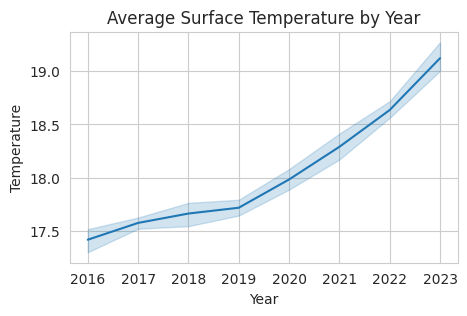

In [77]:
plt.figure(figsize=(5, 3))
sns.lineplot(x = df1.year, y = avg_temperature_by_year)
plt.title("Average Surface Temperature by Year")
plt.xlabel("Year")
plt.ylabel("Temperature")

The graph indicates a steady increase in average temperatures over the years, likely due to global warming caused by human activities like burning fossil fuels and deforestation. This trend highlights the urgent need for climate action to mitigate its impacts.

In [78]:
df1.Entity.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas',
       'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
       'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti',
       'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Falkland Islands', 'Faroe Islands',
       'Fiji', 'Finland', 'France', 'French Polynesia', 'Gabon', 

In [79]:
df1[df1["Entity"] == "World"].groupby(["day","month", "year"])["temperature"].mean().head()

day  month  year
15   April  1940    13.756892
            1941    13.554913
            1942    13.558277
            1943    13.589498
            1944    13.731234
Name: temperature, dtype: float64

In [80]:
df1[ ~(df1["Entity"] == "World")].groupby(["day","month", "year"])["temperature"].mean().head()

day  month  year
15   April  1940    17.567690
            1941    17.794825
            1942    17.763042
            1943    17.553124
            1944    17.862878
Name: temperature, dtype: float64

When comparing the data labeled as 'World' with the average temperatures of other countries, different results are observed. This suggests that the data does not include all countries, but the 'World' label likely represents a global average.

All data points were collected on the 15th of each month, indicating a mid-month sampling approach.

In [81]:
df_world = df1[df1["Entity"] == "World"]
df_filtered = df1[~(df1["Entity"] == "World")]

In [82]:
country_avg_temp = df_filtered.groupby("Entity")["temperature"].mean().sort_values(ascending=False).reset_index()
hottest_countries = country_avg_temp.head().Entity.to_list()[:5]
coldest_countries = country_avg_temp.tail().Entity.to_list()[::-1]
print("Countries with the hottest average temperature:")
print(hottest_countries)
print("\nCountries with the coldest average temperature:")
print(coldest_countries)

Countries with the hottest average temperature:
['Senegal', 'Burkina Faso', 'Mali', 'Djibouti', 'Oman']

Countries with the coldest average temperature:
['Greenland', 'Canada', 'Russia', 'South Georgia and the South Sandwich Islands', 'Tajikistan']


In [83]:
country_avg_temp

,Entity,temperature
0,Senegal,28.180252
1,Burkina Faso,28.105630
2,Mali,28.024058
3,Djibouti,27.809054
4,Oman,27.409557
...,...,...
189,Tajikistan,-0.406663
190,South Georgia and the South Sandwich Islands,-0.991061
191,Russia,-4.227565
192,Canada,-4.261559


## Data visualizations

<ipython-input-84-7533efc70743>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Tajikistan', 'South Georgia and Islands', 'Russia', 'Canada' , 'Greenland'])


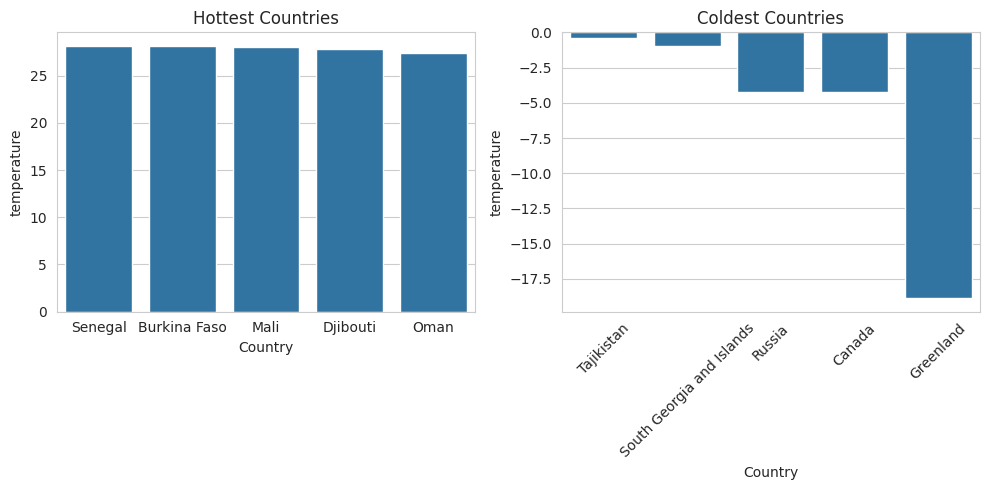

In [84]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.barplot(x="Entity", y="temperature", data=country_avg_temp.head(), ax=ax[0])
ax[0].set_title("Hottest Countries")
ax[0].set_xlabel("Country")
sns.barplot(x="Entity", y="temperature", data=country_avg_temp.tail(), ax=ax[1])
ax[1].set_title("Coldest Countries")
ax[1].set_xlabel("Country")
ax[1].set_xticklabels(['Tajikistan', 'South Georgia and Islands', 'Russia', 'Canada' , 'Greenland'])


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- There is little difference in the average temperatures among the top 5 hottest countries.
- There is a significant difference in the average temperatures among the top 5 coldest countries, with Greenland having the coldest average.

<ipython-input-85-dba411f06f5f>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(['Canada', 'Greenland','Russia', 'South Georgia and Islands', 'Tajikistan'])


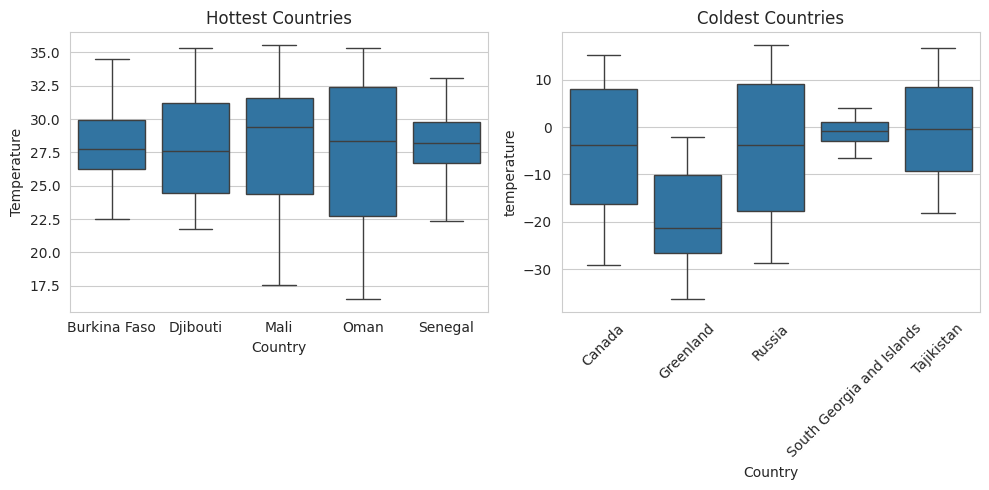

In [85]:
fig, ax = plt.subplots(1,2, figsize=(10, 5))
sns.boxplot(x="Entity", y="temperature", data=df1[df1.Entity.isin(hottest_countries)], ax=ax[0])
ax[0].set_title("Hottest Countries")
ax[0].set_xlabel("Country")
ax[0].set_ylabel("Temperature")
sns.boxplot(x="Entity", y="temperature", data=df1[df1.Entity.isin(coldest_countries)], ax=ax[1])
ax[1].set_title("Coldest Countries")
ax[1].set_xlabel("Country")
ax[1].set_xticklabels(['Canada', 'Greenland','Russia', 'South Georgia and Islands', 'Tajikistan'])


plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- Among the top 5 hottest countries, Burkina Faso and Senegal experience little temperature variation throughout the year, while the other countries show more significant fluctuations.
- South Georgia, in particular, has very little temperature variation throughout the year, whereas other countries exhibit more noticeable seasonal changes.

In [86]:
monthly_avg_temp = df_filtered.groupby("month")["temperature"].mean()

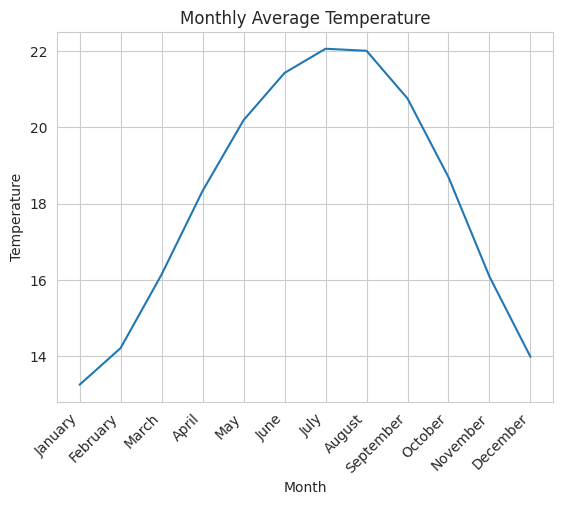

In [87]:
all_months = ["January", "February", "March", "April", "May", "June",
              "July", "August", "September", "October", "November", "December"]
monthly_avg_temp.index = pd.CategoricalIndex(monthly_avg_temp.index, categories=all_months, ordered=True)
monthly_avg_temp = monthly_avg_temp.sort_index()
sns.lineplot(x=monthly_avg_temp.index, y=monthly_avg_temp.values)
plt.title("Monthly Average Temperature")
plt.xlabel("Month")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Temperature")
plt.show()

- When examining the general temperature averages, it is evident that the average temperature during the summer season is higher compared to other seasons.

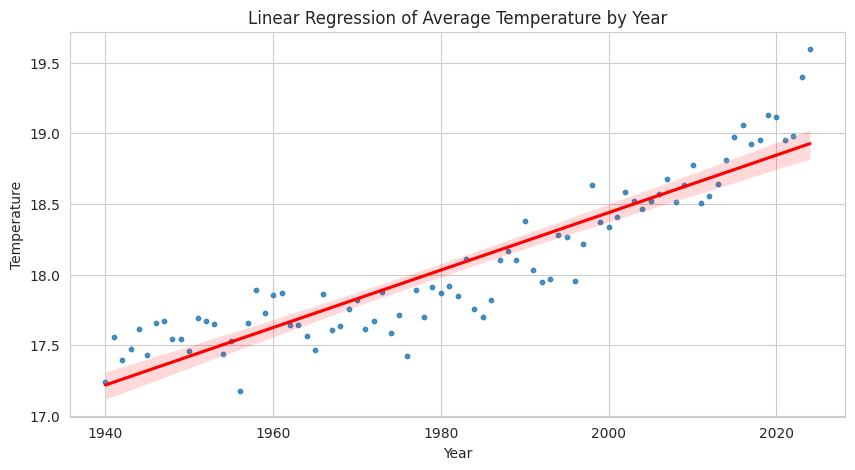

In [88]:
plt.figure(figsize=(10, 5))
sns.regplot(x=avg_temperature_by_year.index, y=avg_temperature_by_year.values, scatter_kws={"s": 10}, line_kws={"color": "red"})
plt.title("Linear Regression of Average Temperature by Year")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.show()

In [89]:
avg_temperature_by_year.values

array([17.24139898, 17.55539628, 17.39750879, 17.47134869, 17.61162429,
       17.43156529, 17.65614215, 17.66990004, 17.54379734, 17.54421509,
       17.45580111, 17.69187171, 17.66942823, 17.64990437, 17.43685287,
       17.53219115, 17.17548862, 17.65569895, 17.89190682, 17.7279295 ,
       17.85337108, 17.86824554, 17.64138202, 17.63981618, 17.56439972,
       17.46562853, 17.85891297, 17.60741324, 17.63608196, 17.75913424,
       17.82115872, 17.61422523, 17.67389164, 17.87457428, 17.58425623,
       17.71665079, 17.42482705, 17.88808883, 17.69973791, 17.91291796,
       17.86942058, 17.91887713, 17.84584015, 18.10956089, 17.75924239,
       17.69925917, 17.81795217, 18.09941175, 18.16562471, 18.10130522,
       18.37557273, 18.03109306, 17.94403861, 17.96485935, 18.27841486,
       18.26852722, 17.95340451, 18.21514665, 18.63425067, 18.37285324,
       18.33408244, 18.40824189, 18.58600808, 18.51935283, 18.4605123 ,
       18.52154342, 18.57060782, 18.67347057, 18.51103337, 18.63

In [90]:
country_trends = {}

for country in df["Entity"].unique():
    country_data = df[df["Entity"] == country].groupby("year")["temperature"].mean().dropna()
    if len(country_data) > 10:
        slope, intercept = np.polyfit(country_data.index, country_data.values, 1)
        country_trends[country] = slope

hottest_countries = sorted(country_trends.items(), key=lambda x: x[1], reverse=True)[:10]
print("Fastest Warming Countries:")
for country, trend in hottest_countries:
    print(f"{country}: {trend:.4f} °C/year")


Fastest Warming Countries:
Norway: 0.0447 °C/year
Saudi Arabia: 0.0394 °C/year
Algeria: 0.0358 °C/year
Tunisia: 0.0356 °C/year
Iceland: 0.0354 °C/year
Belarus: 0.0352 °C/year
Niger: 0.0340 °C/year
Yemen: 0.0339 °C/year
South Sudan: 0.0324 °C/year
Austria: 0.0324 °C/year


# paCe: Construct

## Linear Regression

In [91]:
X = avg_temperature_by_year.index.values.reshape(-1, 1)

y = avg_temperature_by_year.values

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [92]:
future_years = np.arange(1940, 2051).reshape(-1, 1)
future_temps = model.predict(future_years)

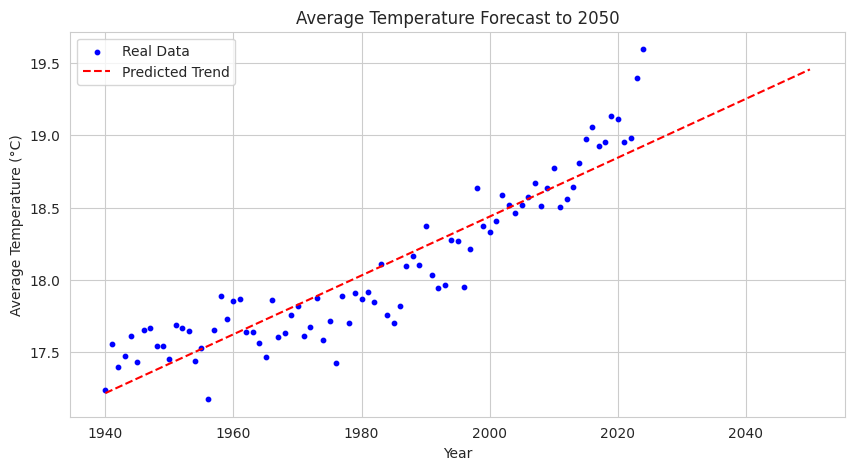

In [93]:
plt.figure(figsize=(10, 5))

plt.scatter(X, y, color="blue", label="Real Data", s=10)

plt.plot(future_years, future_temps, color="red", linestyle="dashed", label="Predicted Trend")

plt.title("Average Temperature Forecast to 2050")
plt.xlabel("Year")
plt.ylabel("Average Temperature (°C)")
plt.legend()
plt.show()

If global warming is not curbed and measures to protect nature are not taken in the coming years, we can expect the average temperature to increase by an additional 1 degree.

# pacE: Execute


## Summary

- Average temperatures have been steadily increasing over the years, primarily due to global warming caused by human activities such as burning fossil fuels and deforestation.
- There is little variation in average temperatures among the top 5 hottest countries, while significant differences exist among the top 5 coldest countries. Greenland stands out as the country with the coldest average
- Average temperatures are higher during the summer months compared to other seasons.
- If global warming is not addressed, average temperatures are expected to rise by an additional 1 degree in the coming years. This underscores the urgent need for measures to mitigate the impacts of climate change.